In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pylab as plt

import math
import sys
import os
import yaml
import numpy as np

import so3g
from so3g.hk.getdata import HKArchiveScanner
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10, 8]

In [2]:
pwd

'/home/sab267/so-thermometry-analysis'

In [3]:
cd ../git/so-rox-calibration/bin/

/home/sab267/git/so-rox-calibration/bin


In [4]:
from roxcal.data import trim_data, \
                        cluster_time_and_data_arrays, \
                        extract_temperature_data, \
                        extract_temperature_verification_data

from roxcal.cal import Calibration
from uncertainties_ver_runs import get_sensor_data

In [5]:
temperatures = [0.2, 0.195, 0.19, 0.185, 0.18,
                0.175, 0.17, 0.165, 0.16, 0.155, 0.15, 0.145, 0.14, 0.135,
                0.13, 0.125, 0.12, 0.115, 0.11, 0.105, 0.1, 0.095, 0.09,
                0.085, 0.08, 0.075, 0.07, 0.065, 0.06, 0.055]

### Note:

1. it's possible some verification curves went all the way to 220mk and others didn't so might not be such a seamless process

In [6]:
with open('verification_runs_files.yaml', 'r') as f:
    all_verify_runs = yaml.safe_load(f)

In [7]:
all_verify_data = []
for file in all_verify_runs['files']:
    print(file)
    data = get_sensor_data(file)
    print(data)
    all_verify_data.append(data)

input/20210623_50_200mk_verification.yaml
Calculating 2
Calculating 4
Calculating 6
Calculating 7
Calculating 8
{'CAL': {'temp_avg': [0.1999940238095238, 0.1949811777777778, 0.19001604444444445, 0.1850131111111111, 0.18001577777777777, 0.17498371111111113, 0.17002033333333333, 0.1650198888888889, 0.1599841333333333, 0.15501888888888893, 0.15000528888888887, 0.14500071111111112, 0.14002613333333336, 0.1349896888888889, 0.13001713333333334, 0.12499782222222221, 0.1199936, 0.11501548888888889, 0.10998544444444443, 0.10500968888888887, 0.10000732888888887, 0.09501333333333332, 0.08996327777777777, 0.08499386222222222, 0.07998044, 0.07499200888888889, 0.06999078888888888, 0.06498133999999998, 0.05999250888888889, 0.05502889111111111]}, 'X-031': {'temp_avg': [0.20009560869565216, 0.19510095652173912, 0.1901293695652174, 0.1851106956521739, 0.1800965217391304, 0.1750874888888889, 0.17008469565217393, 0.1650868695652174, 0.16011399999999998, 0.1550974782608696, 0.15010060869565214, 0.145090130

Calculating 2
Calculating 4
Calculating 8
Calculating 9
Calculating 12
Calculating 13
{'CAL': {'temp_avg': [0.20000213011152415, 0.19499925555555556, 0.19000014074074073, 0.18499876666666668, 0.18000067037037037, 0.17499975925925926, 0.170000843866171, 0.1650001851851852, 0.15999954074074074, 0.1549998111111111, 0.1500000962962963, 0.14499970370370374, 0.14000032962962963, 0.13500011851851854, 0.12999964814814816, 0.12499969259259258, 0.11999959259259259, 0.11500034814814815, 0.10999964814814814, 0.1049997925925926, 0.09999988814814816, 0.09500143777777778, 0.09000086925925925, 0.08500095074074072, 0.07999887814814814, 0.07500189777777778, 0.07000096518518518, 0.06499857074074074, 0.059997487037037035, 0.05499975444444445, 0.04999120888888889]}, 'X-050': {'temp_avg': [0.20001843542435424, 0.19501313703703702, 0.19001034814814816, 0.18501254074074075, 0.18002243911439114, 0.1750047888888889, 0.17003295940959406, 0.1650130664206642, 0.16006451660516607, 0.1550379409594096, 0.149991914814

Calculating 2
Calculating 9
Calculating 12
Calculating 13
{'CAL': {'temp_avg': [0.22000313636363636, 0.19999779999999998, 0.19500991111111113, 0.1900044, 0.1849989111111111, 0.18000153333333332, 0.17500153333333332, 0.1700078888888889, 0.16499600000000003, 0.15999744444444444, 0.15499995555555554, 0.15000151111111112, 0.14500713333333334, 0.14000286666666664, 0.1350025777777778, 0.12999924444444444, 0.12500342222222222, 0.12000108888888888, 0.1150006666666667, 0.10999911111111108, 0.10500351111111111, 0.1000029111111111, 0.09499796222222222, 0.09000162222222223, 0.08500584222222221, 0.08000514666666667, 0.07500963333333333, 0.07000570666666667, 0.06500552444444443, 0.060007148888888896, 0.05500485777777778]}, 'X-068': {'temp_avg': [0.22013231111111115, 0.2000478260869565, 0.19506410869565216, 0.1900358913043478, 0.18509373913043478, 0.18003576086956521, 0.17500604347826085, 0.17002671739130437, 0.16504182608695653, 0.1600512, 0.1550490652173913, 0.1500303111111111, 0.14503104347826087,

In [33]:
len(all_verify_data)

5

In [80]:
serial_numbers = []
#for i in range(len(all_verify_data)):
for ser, values in all_verify_data[0].items():
    serial_numbers.append(ser)

In [62]:
serial_numbers.sort()

In [81]:
serial_numbers

['CAL', 'X-031', 'X-032', 'X-102', 'X-001', 'X-111']

In [40]:
import matplotlib.cm as cm
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10, 8]
cmap = cm.tab20

In [64]:
## IGNORE for now
serial_numbers_for_colors = []
for i in range(len(all_verify_data)):
    for ser, values in all_verify_data[i].items():
        serial_numbers_for_colors.append(ser)


    
#sensor_colors_2 = {}
#for i, ser in enumerate(serial_numbers):
#    sensor_colors[ser] = cmap(i)

In [65]:
#serial_numbers_for_colors

In [66]:
sensor_colors = {}
for i, ser in enumerate(serial_numbers):
    #print(i, ser)
    sensor_colors[ser] = cmap(i)
    

In [67]:
temperatures2 = [0.220, 0.2, 0.195, 0.19, 0.185, 0.18,
                0.175, 0.17, 0.165, 0.16, 0.155, 0.15, 0.145, 0.14, 0.135,
                0.13, 0.125, 0.12, 0.115, 0.11, 0.105, 0.1, 0.095, 0.09,
                0.085, 0.08, 0.075, 0.07, 0.065, 0.06]

### Exploring finding standard deviation at temperature points (50mk, 75mk etc) for just this one set of data for now

CAL
0 0.2
1 0.195
2 0.19
3 0.185
4 0.18
5 0.175
6 0.17
7 0.165
8 0.16
9 0.155
10 0.15
11 0.145
12 0.14
13 0.135
14 0.13
15 0.125
16 0.12
17 0.115
18 0.11
19 0.105
20 0.1
21 0.095
22 0.09
23 0.085
24 0.08
25 0.075
26 0.07
27 0.065
28 0.06
29 0.055
X-001
0 0.2
1 0.195
2 0.19
3 0.185
4 0.18
5 0.175
6 0.17
7 0.165
8 0.16
9 0.155
10 0.15
11 0.145
12 0.14
13 0.135
14 0.13
15 0.125
16 0.12
17 0.115
18 0.11
19 0.105
20 0.1
21 0.095
22 0.09
23 0.085
24 0.08
25 0.075
26 0.07
27 0.065
28 0.06
29 0.055
X-031
0 0.2
1 0.195
2 0.19
3 0.185
4 0.18
5 0.175
6 0.17
7 0.165
8 0.16
9 0.155
10 0.15
11 0.145
12 0.14
13 0.135
14 0.13
15 0.125
16 0.12
17 0.115
18 0.11
19 0.105
20 0.1
21 0.095
22 0.09
23 0.085
24 0.08
25 0.075
26 0.07
27 0.065
28 0.06
29 0.055
X-032
0 0.2
1 0.195
2 0.19
3 0.185
4 0.18
5 0.175
6 0.17
7 0.165
8 0.16
9 0.155
10 0.15
11 0.145
12 0.14
13 0.135
14 0.13
15 0.125
16 0.12
17 0.115
18 0.11
19 0.105
20 0.1
21 0.095
22 0.09
23 0.085
24 0.08
25 0.075
26 0.07
27 0.065
28 0.06
29 0.055
X-102


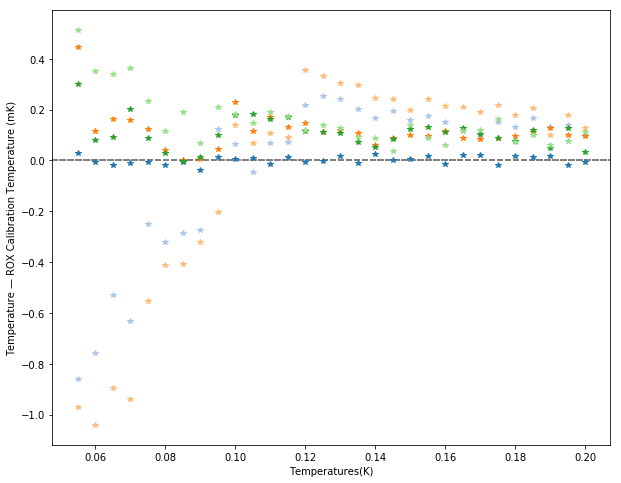

In [68]:
for idx, ser in enumerate(serial_numbers):
    for i, t in enumerate(temperatures):
        plt.errorbar(t, (all_verify_data[0][ser]['temp_avg'][i] - t)*1000, color=sensor_colors[ser], marker='*')
        plt.axhline(y=0, color='grey', linestyle='--', alpha=0.75)
        #plt.legend(ser)
        plt.xlabel("Temperatures(K)")
        plt.ylabel("Temperature — ROX Calibration Temperature (mK)")


#standard deviation of just this set:
residuals = []
for idx, ser in enumerate(serial_numbers):
    print(ser)
    for i, t in enumerate(temperatures):
        print(i, t)
        resids = all_verify_data[0][ser]['temp_avg'][i] - t
        residuals.append(resids)

print(np.std(residuals))

In [17]:
len(temperatures)

30

# Residuals at Various Temperature Steps

### First Data Set

### 55mK Residuals for (X001, X-031, X-032, X-102, X-111)

In [82]:
residuals_55_first_set = []
for idx, ser in enumerate(serial_numbers):
    #print(idx, ser)
    resids = all_verify_data[0][ser]['temp_avg'][-1] - 0.055
    residuals_55_first_set.append(resids)
        
print(np.std(residuals_55_first_set))

0.0006037729712081673


### 75mK Residuals for First Data Set

In [19]:
residuals_75_first_set = []
for idx, ser in enumerate(serial_numbers):
    print(idx, ser)
    for i, t in enumerate(temperatures):
        #print(i, t)
        measurement = all_verify_data[0][ser]['temp_avg'][25]
        #print(measurement)
        resids = all_verify_data[0][ser]['temp_avg'][25] - 0.075
        residuals_75_first_set.append(resids)

0 CAL
1 X-001
2 X-031
3 X-032
4 X-102
5 X-111


In [84]:
all_verify_data[0][ser]['temp_avg'][15]

0.1251398043478261

### 100mK Residuals for First Data Set

In [20]:
residuals_100_firstset = []
for idx, ser in enumerate(serial_numbers):
    for i, t in enumerate(temperatures):
        #print(i, t)
        resids = all_verify_data[0][ser]['temp_avg'][20] - 0.1
        residuals_100_firstset.append(resids)
        
print(np.std(residuals_100))

7.525732121903617e-05


### 150mK Residuals for 1st Dataset

In [21]:
residuals_150_firstset = []
for idx, ser in enumerate(serial_numbers):
    for i, t in enumerate(temperatures):
        #print(i, t)
        resids = all_verify_data[0][ser]['temp_avg'][10] - 0.150
        residuals_150_firstset.append(resids)
        
print(np.std(residuals_150))

6.031177533974835e-05


### 175mK Residuals

In [26]:
residuals_175_firstset = []
for idx, ser in enumerate(serial_numbers):
    for i, t in enumerate(temperatures):
        #print(i, t)
        resids = all_verify_data[0][ser]['temp_avg'][5] - 0.175
        residuals_175_firstset.append(resids)

### 200mK Residuals

In [28]:
residuals_200_firstset = []
for idx, ser in enumerate(serial_numbers):
    for i, t in enumerate(temperatures):
        #print(i, t)
        resids = all_verify_data[0][ser]['temp_avg'][0] - 0.2
        residuals_200_firstset.append(resids)

In [152]:
rox_serialnums5 = []
for ser, values in all_verify_data[4].items():
    rox_serialnums5.append(ser)

In [153]:
rox_serialnums5

['CAL', 'X-068', 'X-071', 'X-079', 'X-064']

In [154]:
for idx, ser in enumerate(rox_serialnums5):
    print(idx, ser)
    #print(all_verify_data[1][ser]['temp_avg'][-1])
    #resids = all_verify_data[1][ser]['temp_avg'][-1] - 0.055
    #residuals_55_2.append(resids)

0 CAL
1 X-068
2 X-071
3 X-079
4 X-064


In [165]:
all_verify_data[4][ser]['temp_avg'][1]

0.20007477777777774

In [ ]:
# now you just need to concatenate all the data you plotted so that you can find the std at various temperature points
# find the residuals for each desired temperature step for each set of data, concatenate the residuals for
# each temperature step, and then find the std of each temperature step residual

### Second Set of Data

In [170]:
serial_numbers2 = []
for ser, values in all_verify_data[1].items():
    serial_numbers2.append(ser)
    
#for idx, ser in enumerate(serial_numbers2):
#    for i, t in enumerate(temperatures):
#        plt.errorbar(t, (all_verify_data[1][ser]['temp_avg'][i] - t)*1000, color=sensor_colors[ser], marker='.')
#        plt.axhline(y=0, color='grey', linestyle='--', alpha=0.75)


        

KeyError: 'X-050'

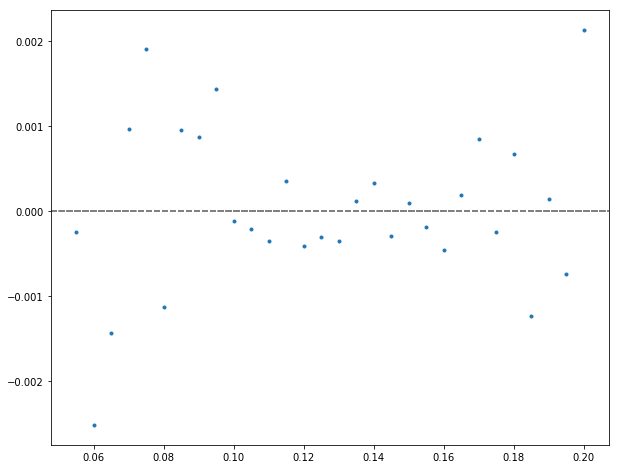

In [171]:
serial_numbers3 = []
for ser, values in all_verify_data[2].items():
    serial_numbers3.append(ser)
    
for idx, ser in enumerate(serial_numbers3):
    for i, t in enumerate(temperatures):
        plt.errorbar(t, (all_verify_data[2][ser]['temp_avg'][i] - t)*1000, color=sensor_colors[ser], marker='.')
        plt.axhline(y=0, color='grey', linestyle='--', alpha=0.75)

KeyError: 'X-057'

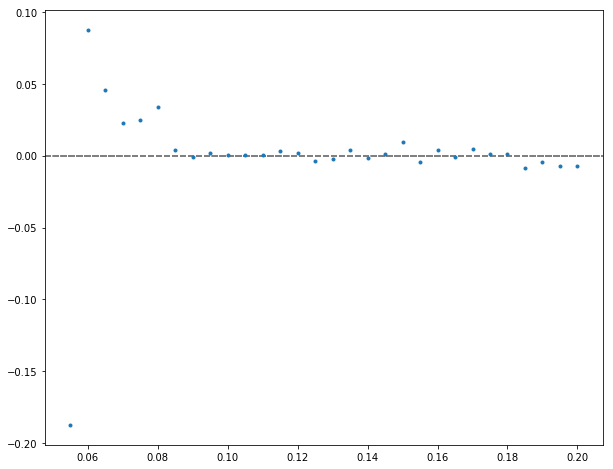

In [172]:
serial_numbers4 = []
for ser, values in all_verify_data[3].items():
    serial_numbers4.append(ser)
    
for idx, ser in enumerate(serial_numbers4):
    for i, t in enumerate(temperatures):
        plt.errorbar(t, (all_verify_data[3][ser]['temp_avg'][i] - t)*1000, color=sensor_colors[ser], marker='.')
        plt.axhline(y=0, color='grey', linestyle='--', alpha=0.75)
        
serial_numbers5 = []
for ser, values in all_verify_data[4].items():
    serial_numbers5.append(ser)
    
for idx, ser in enumerate(serial_numbers5):
    for i, t in enumerate(temperatures2):
        plt.errorbar(t, (all_verify_data[4][ser]['temp_avg'][i] - t)*1000, color=sensor_colors[ser], marker='.')
        plt.axhline(y=0, color='grey', linestyle='--', alpha=0.75)
#finding the average of the ydata!!

In [174]:


residuals2 = []
for idx, ser in enumerate(serial_numbers2):
    for i, t in enumerate(temperatures):
        resids = all_verify_data[1][ser]['temp_avg'][i] - t
        residuals2.append(resids)
        
residuals3 = []
for idx, ser in enumerate(serial_numbers3):
    for i, t in enumerate(temperatures):
        resids = all_verify_data[2][ser]['temp_avg'][i] - t
        residuals3.append(resids)
        
residuals4 = []
for idx, ser in enumerate(serial_numbers4):
    for i, t in enumerate(temperatures):
        resids = all_verify_data[3][ser]['temp_avg'][i] - t
        residuals4.append(resids)
        
#residuals5 = []
#for idx, ser in enumerate(serial_numbers5):
#    for i, t in enumerate(temperatures):
#        resids = all_verify_data[4][ser]['temp_avg'][i] - t
#        residuals5.append(resids)

In [177]:
len(residuals4)

180

In [179]:
print(np.average(residuals), np.average(residuals2), np.average(residuals3), np.average(residuals4))
      

5.135808365922839e-05 4.069404931561664e-05 0.0003012506318368089 -8.51778633923803e-05


In [181]:
print(np.std(residuals), np.std(residuals2), np.std(residuals3), np.std(residuals4))




0.00023556844885847802 0.00010674694713447146 0.0005341420899927741 0.0005488877049251267


In [182]:
print(len(residuals), len(residuals2), len(residuals3), len(residuals4))

180 240 210 180


In [183]:
residuals = np.array(residuals)
residuals2 = np.array(residuals2)
residuals3 = np.array(residuals3)
residuals4 = np.array(residuals4)
residuals5 = np.array(residuals5)

In [184]:
trial_final_resids = np.concatenate((residuals, residuals2, residuals3, residuals4, residuals5))

In [185]:
len(trial_final_resids)

810

In [186]:
np.std(trial_final_resids) #2.2mK 

0.0004195408978355499